In [16]:
%load_ext autoreload
%autoreload 2
import os
#change current working directory to the parent directory
import sys

# Change working directory to ../.. only if not already there
if not hasattr(sys, "_parent_dir_set"):
    parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
    if os.getcwd() != parent_dir:
        os.chdir(parent_dir)
    sys._parent_dir_set = parent_dir
else:
    parent_dir = sys._parent_dir_set
# Add parent_dir to sys.path only if not already present
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

import numpy as np
from SRtools import sr_mcmc as srmc
from SRtools import deathTimesDataSet as dtds
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


 # Raw Data loading and plotting

In [17]:
rawDataFile = 'Rawfiles/240116 VetCompass Cat lifetable - Open access data.xlsx'



In [18]:
properties = ['sex_neutered']
events_col ='events'
event_is_censored = False
death_times_column ='Age at death'
selection_criteria = {'sex_neutered': ['Male-Neutered','Female-Neutered']}
cleanedDataFile = 'Cleaned_datasets/Cats_VP'
cohorts = dtds.dataCollectionFromExcel(excel_file_name=rawDataFile,properties=properties,events_column=events_col,death_times_column=death_times_column,event_is_censored=event_is_censored)

In [19]:
print(cohorts.datasets.keys())

dict_keys(['sex_neutered:_Female-Entire,sheet:_240116 Open access Cat Lifetabl,index:_0', 'sex_neutered:_Female-Neutered,sheet:_240116 Open access Cat Lifetabl,index:_0', 'sex_neutered:_Male-Entire,sheet:_240116 Open access Cat Lifetabl,index:_0', 'sex_neutered:_Male-Neutered,sheet:_240116 Open access Cat Lifetabl,index:_0', 'sex_neutered:_Unknown-Unknown,sheet:_240116 Open access Cat Lifetabl,index:_0'])


In [20]:
cohorts.nDatasets()

5

['Unknown-Unknown', 'Female-Entire', 'Female-Neutered', 'Male-Entire', 'Male-Neutered']


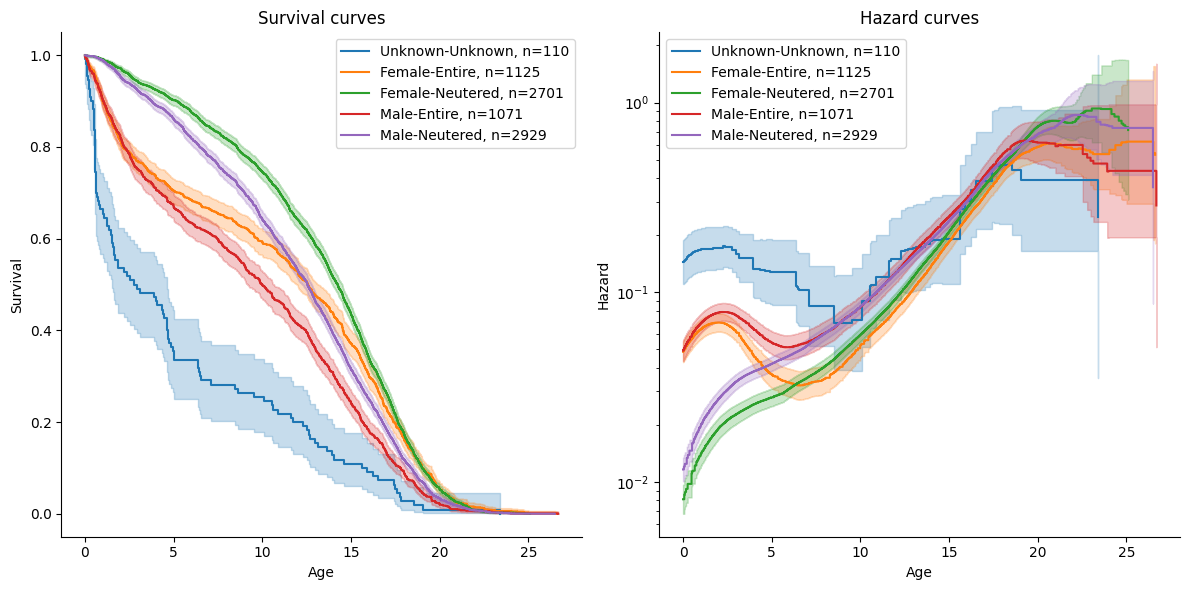

In [21]:
prop = 'sex_neutered'
prop_values = []
for dataset in cohorts.datasets.values():
    prop_values.append(dataset.properties[prop][0])
prop_values = list(set(prop_values))
print(prop_values)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
ax_surv = axs[0]
ax_haz = axs[1]

for value in prop_values:
    cohort = cohorts.get_combined_dataset(properties=[prop], values=[value])
    if cohort is not None:
        # Survival curve on left panel
        cohort.plotSurvival(ax=ax_surv, label=f"{value}, n={cohort.n}")
        # Hazard curve on right panel, with ylogscale
        cohort.plotHazard(ax=ax_haz, label=f"{value}, n={cohort.n}")

ax_surv.set_title("Survival curves")
ax_surv.set_xlabel("Age")
ax_surv.set_ylabel("Survival")
ax_surv.legend()

ax_haz.set_title("Hazard curves")
ax_haz.set_xlabel("Age")
ax_haz.set_ylabel("Hazard")
ax_haz.set_yscale("log")
ax_haz.legend()

plt.tight_layout()



In [23]:
males = cohorts.getSubset(properties=['sex_neutered'],values=['Male-Neutered'])
malesds = males.get_combined_dataset()

females = cohorts.getSubset(properties=['sex_neutered'],values=['Female-Neutered'])
femalesds = females.get_combined_dataset()

<Axes: xlabel='Age'>

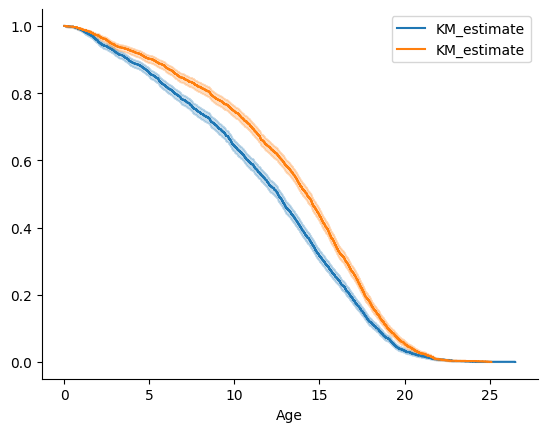

In [24]:
ax = malesds.plotSurvival()
femalesds.plotSurvival(ax=ax)


In [25]:
malesds.toCsv(cleanedDataFile+'_M.csv')
femalesds.toCsv(cleanedDataFile+'_F.csv')